<h1 align = center> <font color = '#FA5F55'>  Hyperparameter Tuning Techniques</h1> </font>

<h3> What is the hyperparameter ?</h3>

Hyperparameters are parameters that are not directly learned within the model training process but are set beforehand. They can significantly impact the model's performance, including the convergence speed, the quality of the predictions, and the ability to generalize to unseen data.

<h3> How do we choose hyperparameters?</h3>

Choosing hyperparameters requires a careful and systematic approach. Here are some strategies:

- Grid Search: This method involves systematically testing different combinations of hyperparameters and selecting the combination that produces the best performance.

- Random Search: This method also involves testing different combinations of hyperparameters, but it randomly selects combinations instead of systematically testing them.

- Bayesian Search: This method also involves testing different combinations of hyperparameters and selecting the combination that produces the best performance.


- Cross-Validation: This method involves dividing the dataset into k subsets, training the model on k-1 subsets, and evaluating its performance on the remaining subset. The performance is then averaged over the k iterations.


#### Advantages And Disadvantages Of Grid Search :

Advantages:
- It Guarantees to identify the best performing hyperparameters.
- It provides a systematic approach to finding the optimal hyperparameters.
- It works really well in small datasets and when only few hyperparameters need to be testes.

Disadvantages:
- It may take longer to find the optimal hyperparameters compared to Random Search.

#### Advantages And Disadvantages Of Random Search CV :

Advantages:
- It can identify hyperparameters sets that will perform close to best score GridSearch Method with less cost in large datasets.
- It can handle large datasets more effectively than Grid Search.

Disadvantages:
- It cannot guarantees the most optimal hyperparameters.
- It may take longer to find the optimal hyperparameters compared to Grid Search.



<h2 align = center> <font color = '#C21E56'>Importing Necessary Libraries</h2>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from skopt.searchcv import BayesSearchCV


<h2 align = center > <font color = '#702963'>Importing Classification Dataset</h2>

In [3]:
data = pd.read_csv('alzheimers_data.csv')


<h2 align = center><font color = '#7F00FF'> About Dataset </font></h2>
This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

## Patient Information
### Patient ID
PatientID: A unique identifier assigned to each patient (4751 to 6900).
### Demographic Details
Age: The age of the patients ranges from 60 to 90 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

### Lifestyle Factors
BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

### Medical History
FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.

Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.

HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.

Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

### Clinical Measurements
SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.

CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

### Cognitive and Functional Assessments
MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

### Symptoms
Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.

Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.

PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.

DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.

Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

### Diagnosis Information

Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

### Confidential Information

DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

<h2 align = center> <font color = '	#FA5F55'>Exploring Data </h2>

<h3>Data Head</h3>

In [4]:
data.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


<h3>Data Columns</h3>

In [5]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

<h3>Data Columns Datatypes</h3>

In [6]:
data.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

<h3>Checking for Null Values</h3>


In [7]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

<h3>Shape Of Data</h3>


In [8]:
data.shape

(2149, 35)

<h2 align = center> <font color = "#00FF7F"> Data Preprocessing </font></h2>


<h3>Dropping PatientID and DoctorIncharge Columns</h3>



In [9]:
data.drop(['PatientID','DoctorInCharge'] , axis = 1,inplace= True)

<h3>Data Scaling</h3>

Because some columns are in 2 digits, and most of the columns are in single digits , so scaling will be better for increasing model performance

In [10]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Diagnosis' , axis=1)
y = data['Diagnosis']

scaler = StandardScaler()

xScaled = scaler.fit_transform(X)




<h3>Splitting Data Into Training And Testing Data</h3>

In [11]:

X_train, X_test, y_train, y_test = train_test_split(xScaled,y, test_size=0.2, random_state=42)


<h2 align = center> <font color = '#DFFF00'>Model Training </font></h2>

In [12]:
defaultSVMModel = SVC()
defaultLRModel = LogisticRegression()
defaultKNNModel = KNeighborsClassifier()

defaultSVMModel.fit(X_train, y_train)
defaultLRModel.fit(X_train, y_train)
defaultKNNModel.fit(X_train, y_train)

defaultSVMModelScore = defaultSVMModel.score(X_test, y_test)
defaultLRModelScore = defaultLRModel.score(X_test, y_test)
defaultKNNModelScore = defaultKNNModel.score(X_test, y_test)


print(f"Default SVM Model Score: {defaultSVMModelScore}")
print(f"Default Logistic Regression Model Score: {defaultLRModelScore}")
print(f"Default K-Nearest Neighbors Model Score: {defaultKNNModelScore}")


Default SVM Model Score: 0.8325581395348837
Default Logistic Regression Model Score: 0.8302325581395349
Default K-Nearest Neighbors Model Score: 0.7232558139534884


<h3>Cross Validation</h3>

In [28]:
defaultSVMCVScores = cross_val_score(SVC(), xScaled, y, cv=5)
defaultLGCVScores = cross_val_score(LogisticRegression(), xScaled, y, cv=5)
defaultKNNCVScores = cross_val_score(KNeighborsClassifier(), xScaled, y, cv=5)

print(f"Mean Score Of Default SVM : {np.mean(defaultSVMCVScores)}")
print(f"Mean Score Of Default Logistic Regression : {np.mean(defaultLGCVScores)}")
print(f"Mean Score Of Default KNN : {np.mean(defaultKNNCVScores)}")





Mean Score Of Default SVM : 0.8347644603458557
Mean Score Of Default Logistic Regression : 0.835224155689272
Mean Score Of Default KNN : 0.7268314631105329


### Interpretation

The default Logistic Regression model has the highest mean score, followed by the SVM model, and then the K-Nearest Neighbors model. This indicates that the Logistic model performs well on the given dataset without any hyperparameter Tuning.



<h2 align = center><font color = '#7B3F00'>HyperParameter Tuning </font></h2>

---

### Making a funciton for plotting hyperparameters 

In [47]:
def plot_hyperparameter(results_df, param_name):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=f'param_{param_name}', y='mean_test_score', data=results_df, marker='o')
    plt.title(f'Mean Test Score vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Mean Test Score')
    plt.show()



<h2 align = center > <font color =  '#0818A8'>Random Search </font></h2>

<h3>Hyperparameter Tuning Of Logistic Regression</h3>

In [14]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'dual':[False,True],
    'tol' : [0.0001 ,0.0002,0.0004,0.001],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']
}

randomized = RandomizedSearchCV(estimator=defaultLRModel , param_distributions=parameters , n_iter=2000 , cv = 5)
randomized.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1120 is smaller than n_iter=2000. Running 1120 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=2000,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['balanced', None],
                                        'dual': [False, True],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [42],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.0002, 0.0004, 0.001]})

### Plotting

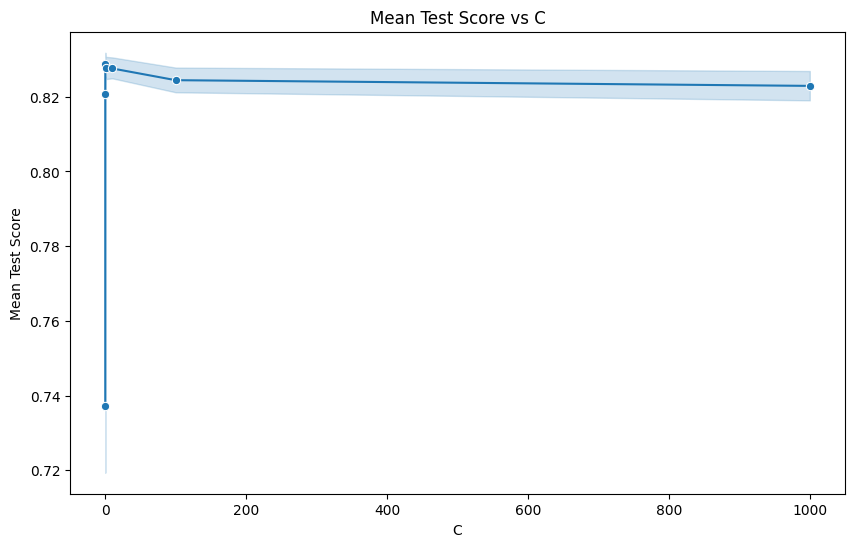

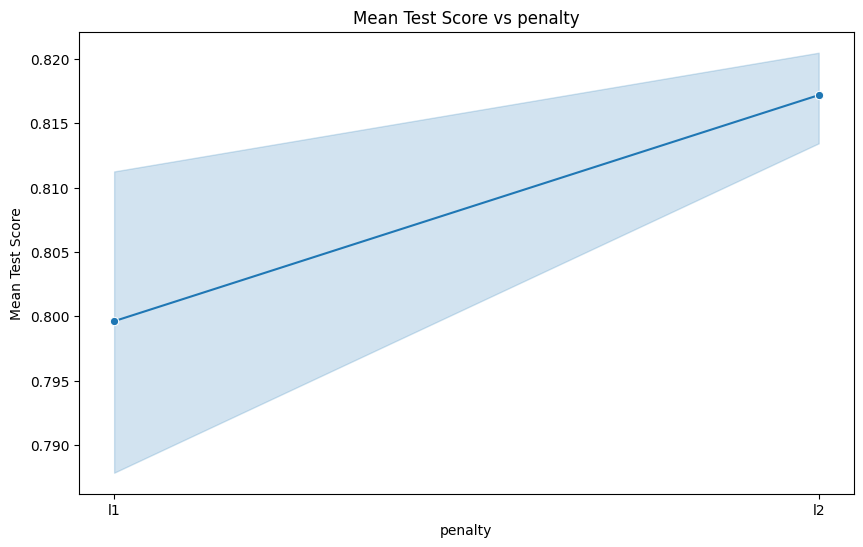

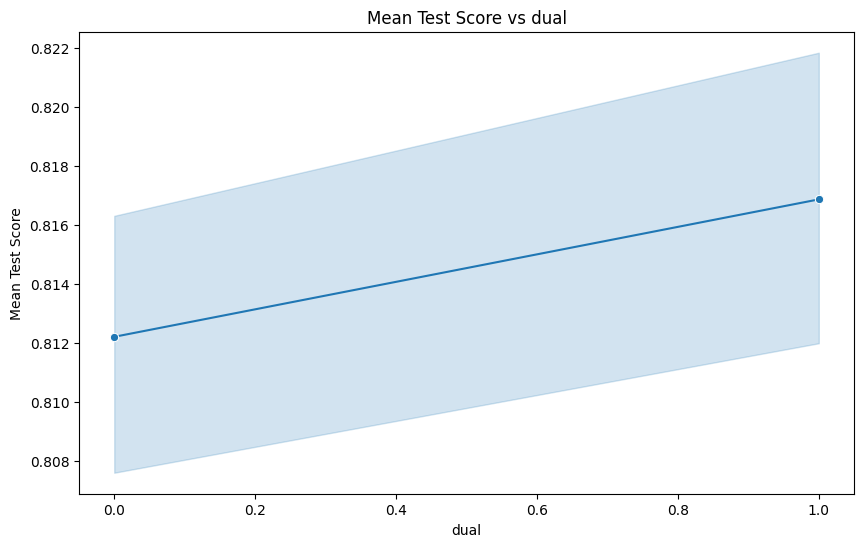

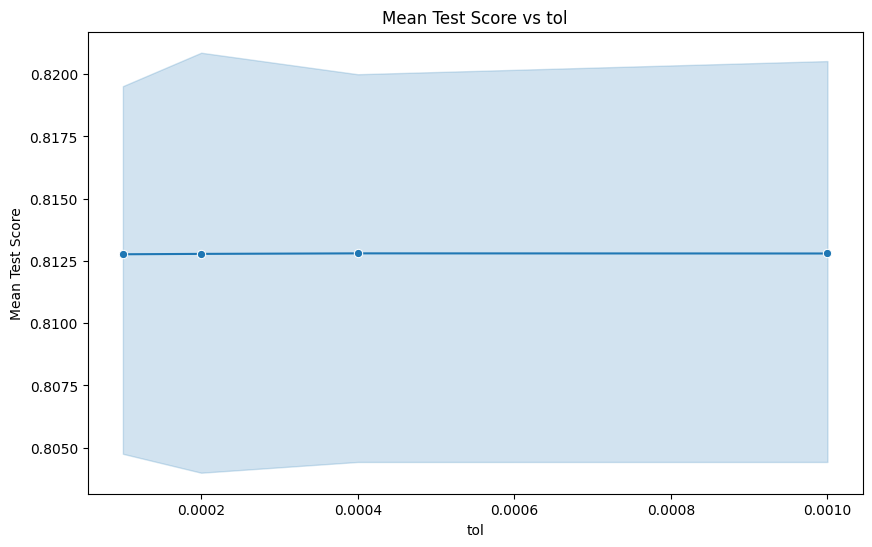

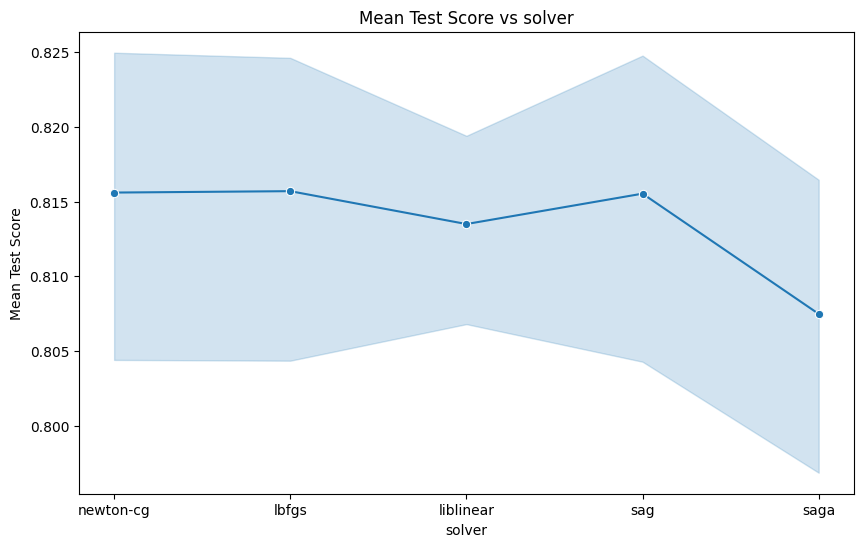

In [49]:
results = pd.DataFrame(randomized.cv_results_)


# Plotting for All the parameters one by one

plot_hyperparameter(results,'C')
plot_hyperparameter(results,'penalty')
plot_hyperparameter(results,'dual')
plot_hyperparameter(results,'tol')
plot_hyperparameter(results,'solver')



### Interpretations

Above plots shows the mean model score with respect to different hyperparameters

<h3> Finding Best Features </h3>


In [20]:
from sklearn.metrics import accuracy_score
# Get the best hyperparameters and model
best_params_rand = randomized.best_params_
best_model_rand = randomized.best_estimator_

# Evaluate the best model
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
print(f"Best Logistic Accuracy: {accuracy_best_rand:.4f}")
print(f"Best Hyperparameters: {best_params_rand}")

Best Logistic Accuracy: 0.8326
Best Hyperparameters: {'tol': 0.001, 'solver': 'liblinear', 'random_state': 42, 'penalty': 'l1', 'dual': False, 'class_weight': None, 'C': 0.1}


### Conclusion

Logistic Regression doing better performance in default parameters than randomized tuning hyperparameter.

<h3>Hyperparameter Tuning Of Support Vector Machine (SVM)</h3>

In [16]:
SVMparameters = {

    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly','sigmoid'],
    'class_weight': ['balanced', None],
    'degree': [1, 2, 3, 4, 5],
    'tol': [0.0001 ,0.0002,0.0004,0.001],
    'decision_function_shape': ['ovo', 'ovr'],
    'probability': [True, False],
}

randomizedSVM = RandomizedSearchCV(estimator=defaultSVMModel , param_distributions=SVMparameters , n_iter=20 , cv = 5)
randomizedSVM.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['balanced', None],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'tol': [0.0001, 0.0002, 0.0004, 0.001]})

### Plotting

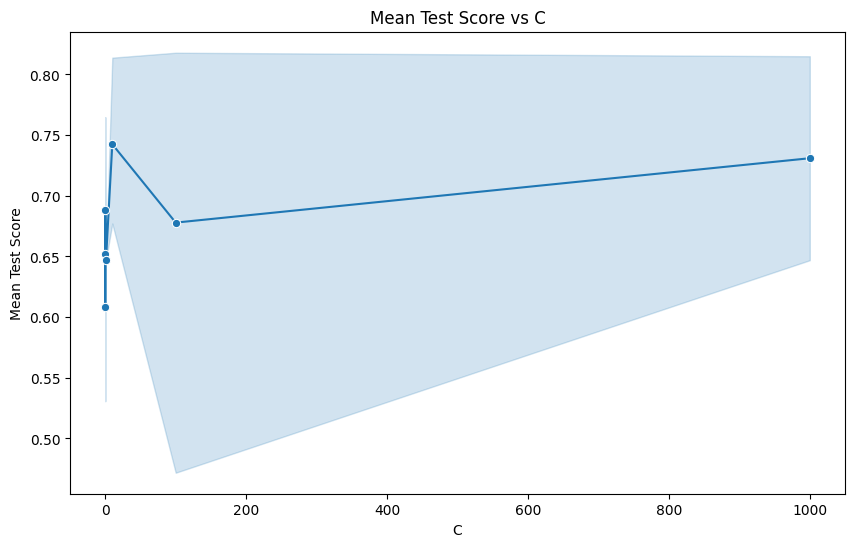

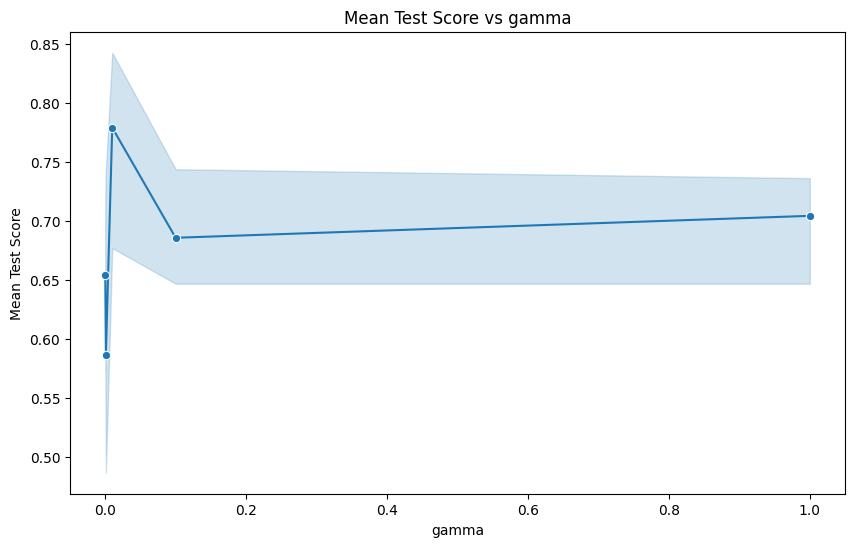

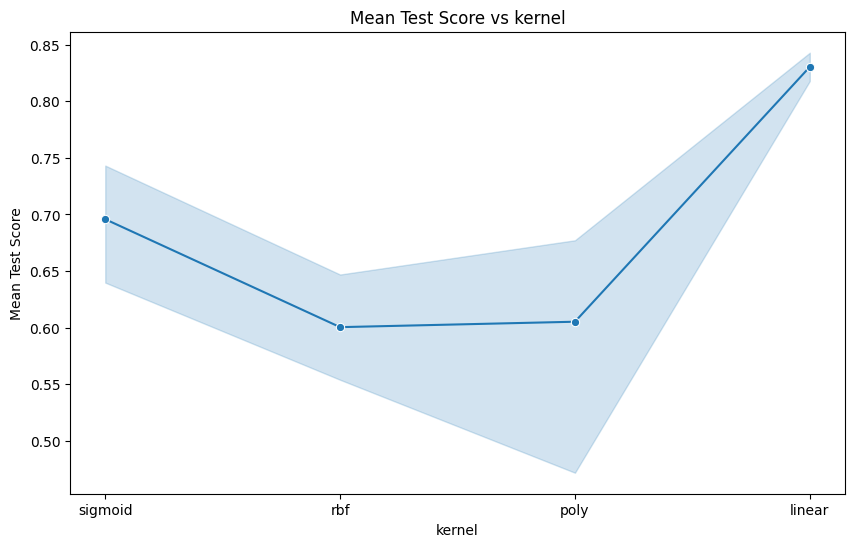

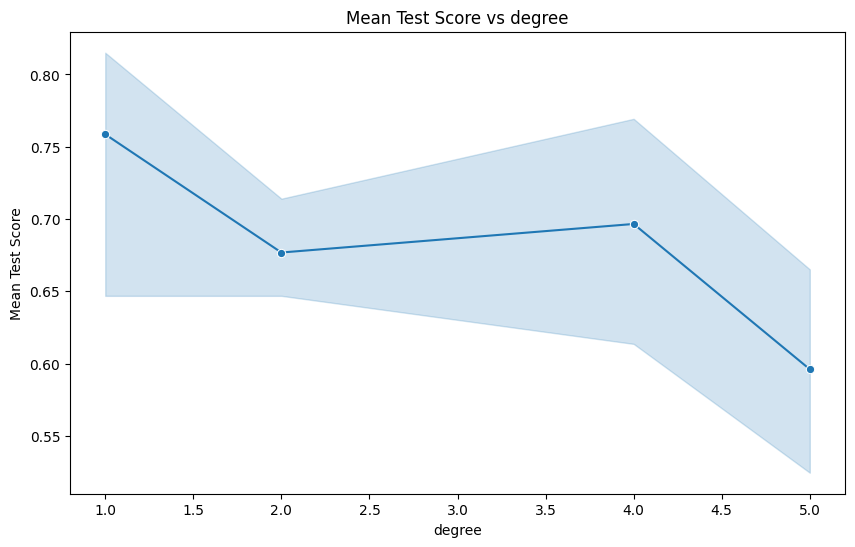

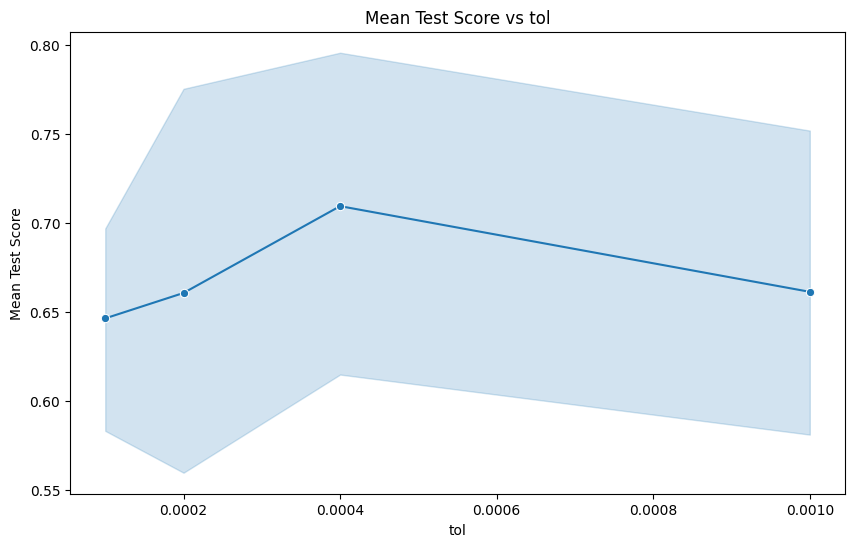

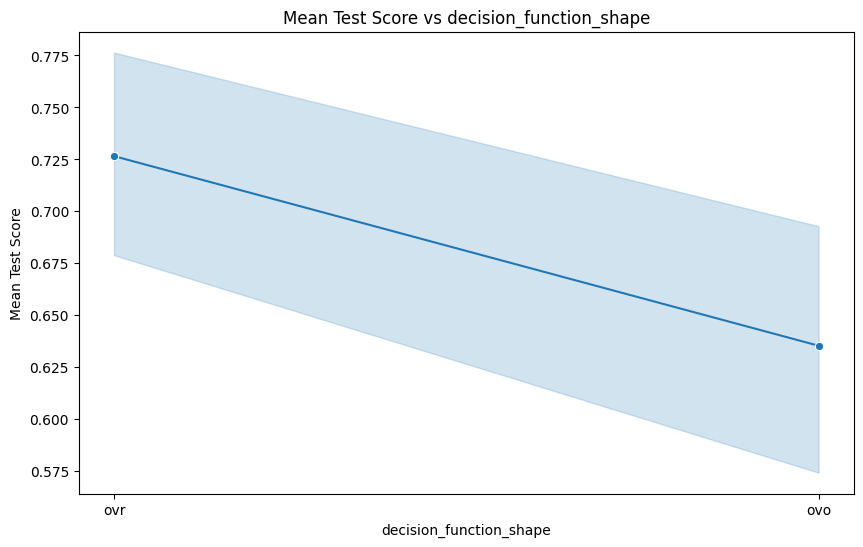

In [50]:
results_SVM = pd.DataFrame(randomizedSVM.cv_results_)

# Plotting for All the parameters one by one

plot_hyperparameter(results_SVM,'C')
plot_hyperparameter(results_SVM,'gamma')
plot_hyperparameter(results_SVM,'kernel')
plot_hyperparameter(results_SVM,'degree')
plot_hyperparameter(results_SVM,'tol')
plot_hyperparameter(results_SVM,'decision_function_shape')


### Interpretation

Above plots shows the mean model score with respect to different hyperparameters

<h3> Finding Best Features </h3>


In [19]:
# Get the best hyperparameters and model
best_params_rand = randomizedSVM.best_params_
best_model_rand = randomizedSVM.best_estimator_

# Evaluate the best model
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
print(f"Best SVM Accuracy: {accuracy_best_rand:.4f}")
print(f"Best Hyperparameters: {best_params_rand}")

Best SVM Accuracy: 0.8256
Best Hyperparameters: {'tol': 0.0004, 'probability': True, 'kernel': 'linear', 'gamma': 0.01, 'degree': 4, 'decision_function_shape': 'ovr', 'class_weight': None, 'C': 0.01}


### Conclusion

SVM model doing better performance in default parameters than randomized tuning hyperparameter.


<h3>Hyperparameter Tuning Of K-Nearest Neighbors (KNN)</h3>


In [21]:
KNNparameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'weights': ['uniform', 'distance'],
   'metric': ['euclidean','manhattan', 'chebyshev','minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

randomizedKNN = RandomizedSearchCV(estimator=defaultKNNModel , param_distributions=KNNparameters , n_iter=20 , cv = 5)
randomizedKNN.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11],
                                        'weights': ['uniform', 'distance']})

### Plotting



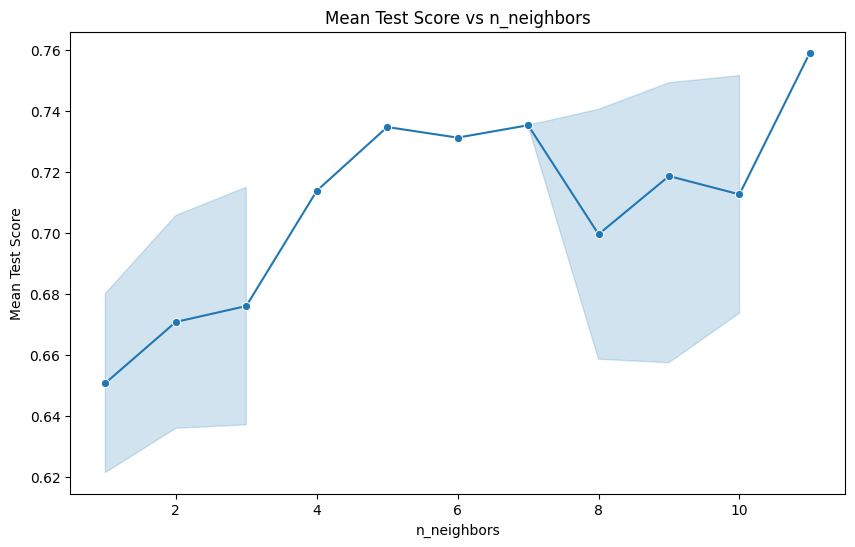

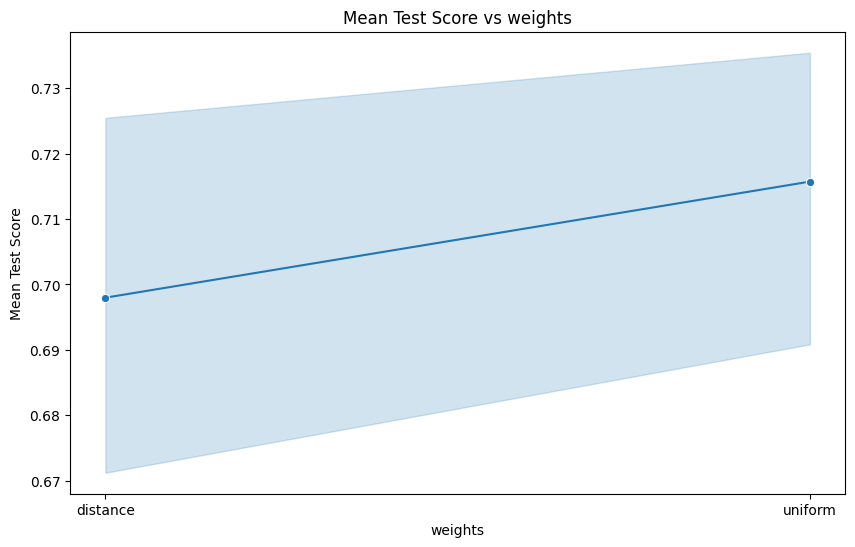

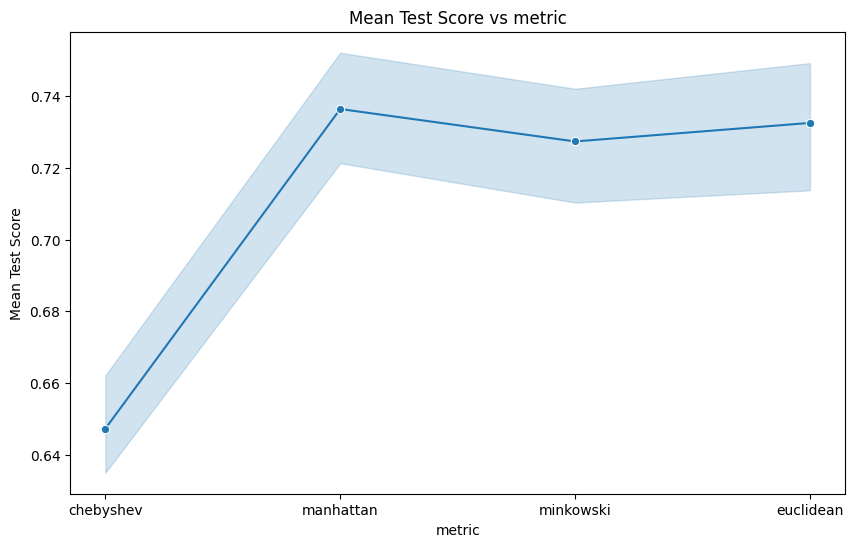

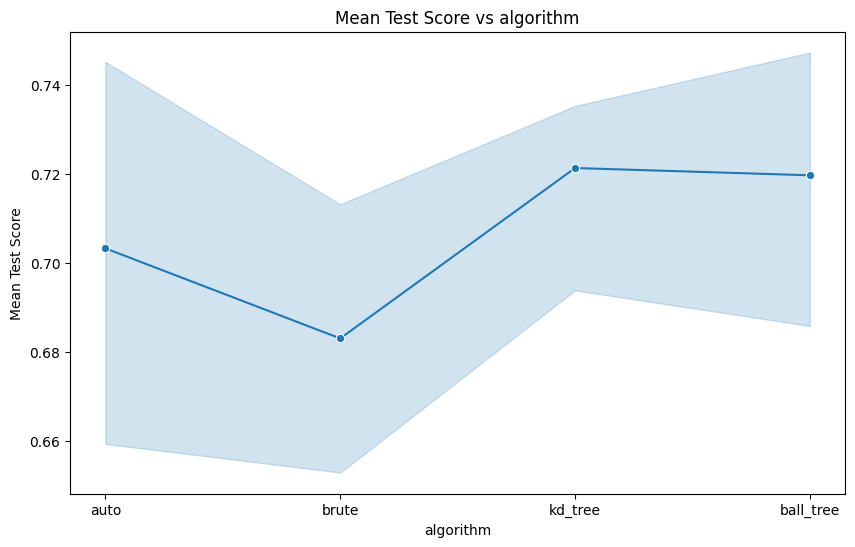

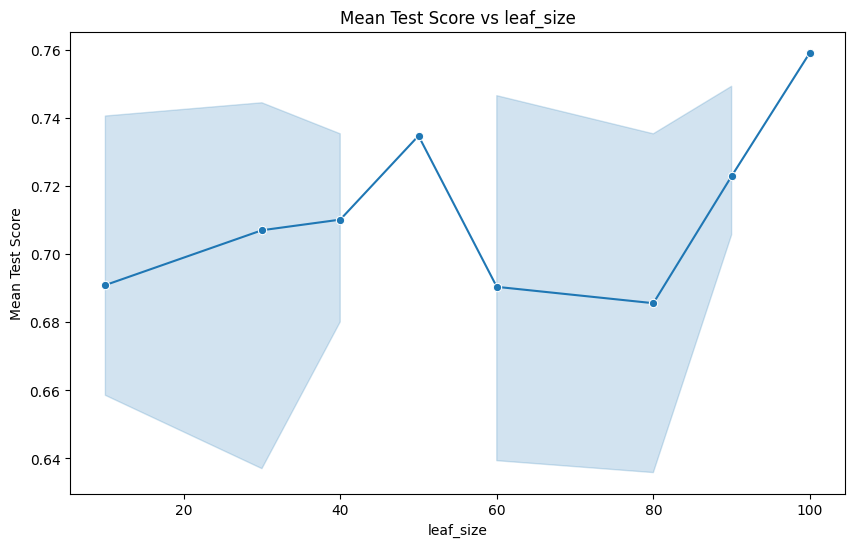

In [51]:

results_KNN = pd.DataFrame(randomizedKNN.cv_results_)

# Plotting for All the parameters one by one

plot_hyperparameter(results_KNN,'n_neighbors')
plot_hyperparameter(results_KNN,'weights')
plot_hyperparameter(results_KNN,'metric')
plot_hyperparameter(results_KNN,'algorithm')
plot_hyperparameter(results_KNN,'leaf_size')

### Interpretation

Above plots shows the mean model score with respect to different hyperparameters

<h3> Finding Best Features </h3>


In [22]:
# Get the best hyperparameters and model
best_params_rand = randomizedKNN.best_params_
best_model_rand = randomizedKNN.best_estimator_

# Evaluate the best model
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
print(f"Best KNN Accuracy: {accuracy_best_rand:.4f}")
print(f"Best Hyperparameters: {best_params_rand}")

Best KNN Accuracy: 0.7209
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan', 'leaf_size': 100, 'algorithm': 'auto'}


### Conclusion

KNN model doing better performance in default parameters than randomized tuning hyperparameter.



<h2 align = center> <font color = '#2E8B57'>Grid Search </font></h2>

In [23]:
from sklearn.model_selection import GridSearchCV

<h3>Hyperparameter Tuning Of Logistic Regression</h3>

In [26]:
LGparameter_grid = {

    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'dual':[False,True],
    'tol' : [0.0001 ,0.0002,0.0004,0.001],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']
}


lgGrid = GridSearchCV(estimator=defaultLRModel , param_grid=LGparameter_grid ,  cv = 5)
lgGrid.fit(X_train, y_train)


c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'dual': [False, True], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.0002, 0.0004, 0.001]})

### Plotting

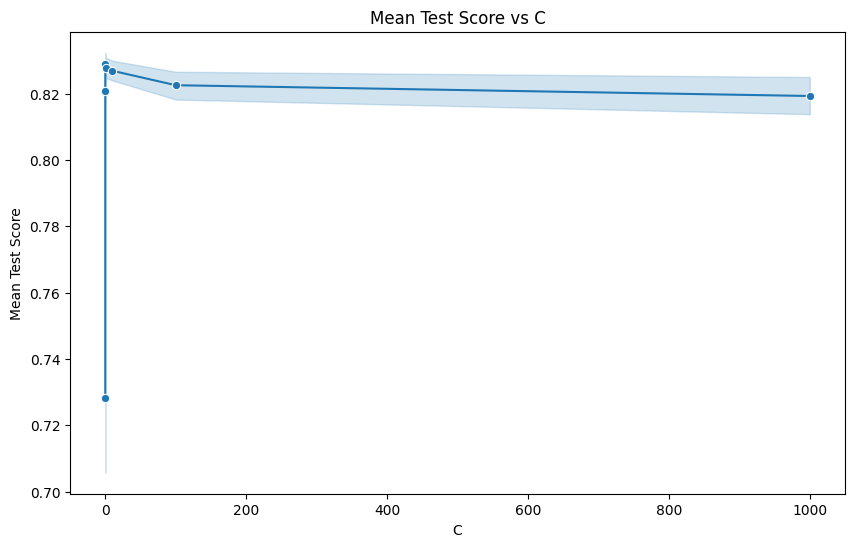

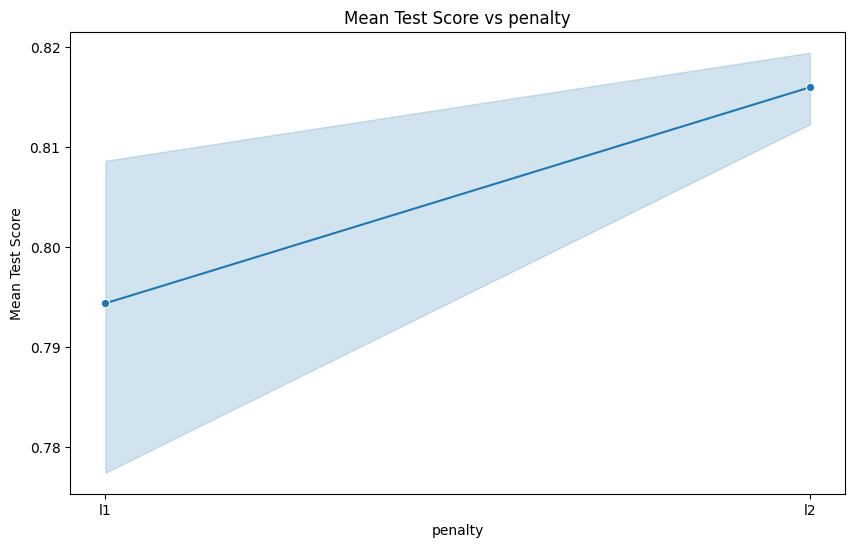

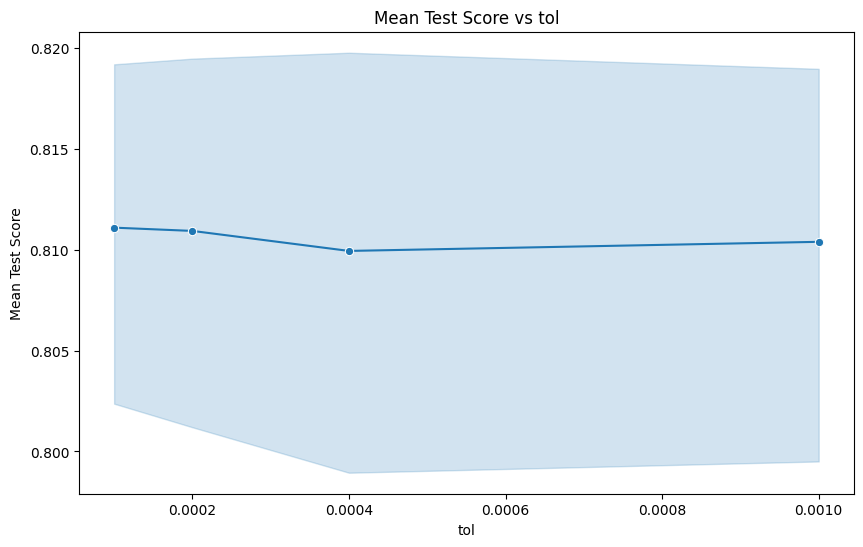

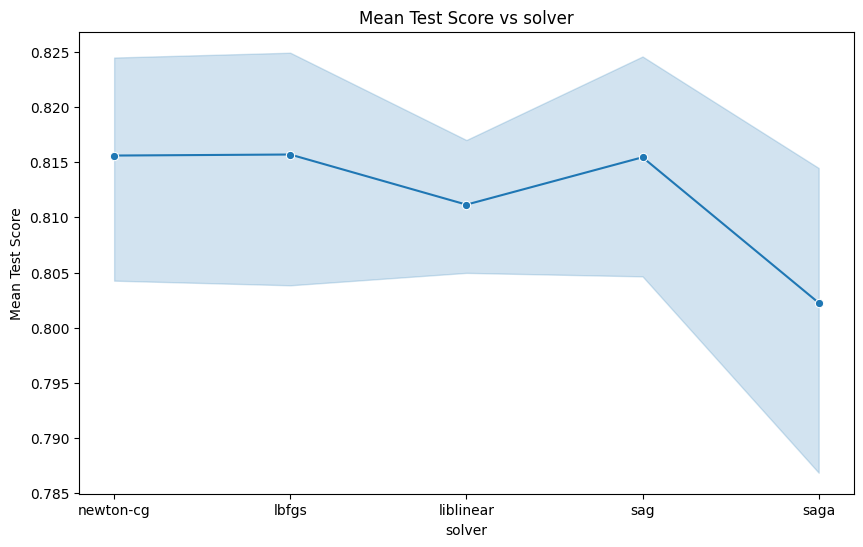

In [52]:
results_lg = pd.DataFrame(lgGrid.cv_results_)

# Plotting for All the parameters one by one

plot_hyperparameter(results_lg,'C')
plot_hyperparameter(results_lg,'penalty')
plot_hyperparameter(results_lg,'tol')
plot_hyperparameter(results_lg,'solver')

<h3> Finding Best Features </h3>



In [27]:
# Get the best hyperparameters and model
best_params = lgGrid.best_params_
best_model = lgGrid.best_estimator_


# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Logistic Regression Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")

Best Logistic Accuracy: 0.8326
Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0004}


### Conclsion

Logistic Regression model doing better performance in default parameters than grid search hyperparameter.


<h3>Hyperparameter Tuning Of Support Vector Machine (SVM)</h3>


In [31]:
SVMparameter_grid = {

    'C': [ 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1,'scale','auto'],
    'kernel': ['rbf', 'linear', 'poly','sigmoid'],    
}

svmGrid = GridSearchCV(estimator=defaultSVMModel , param_grid=SVMparameter_grid ,  cv = 5)
svmGrid.fit(X_train, y_train)
    

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 'scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

### Plotting

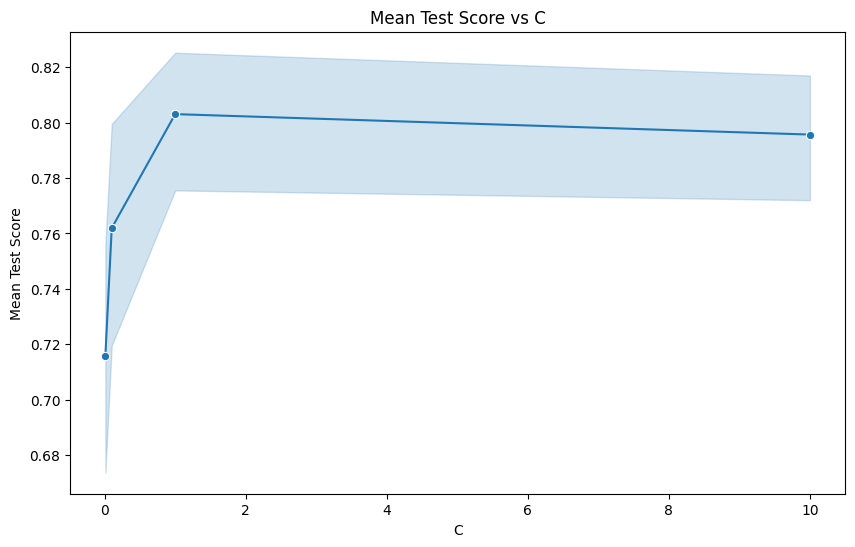

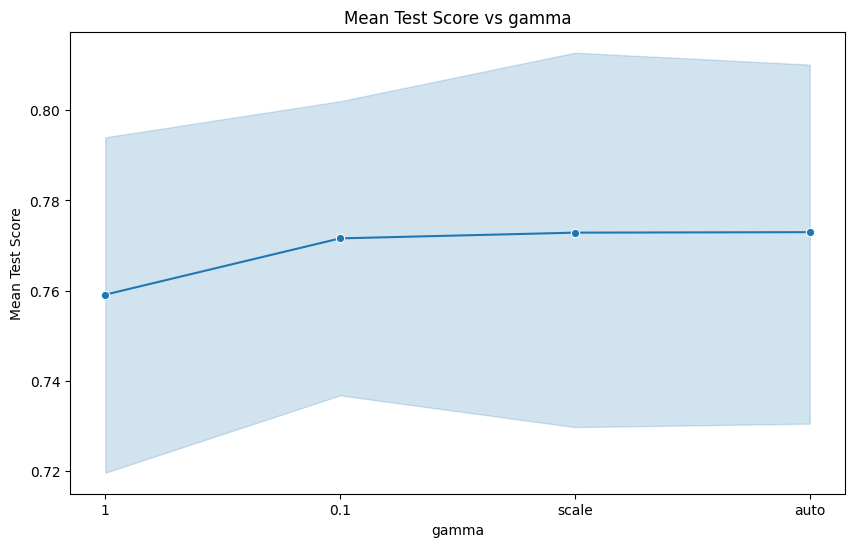

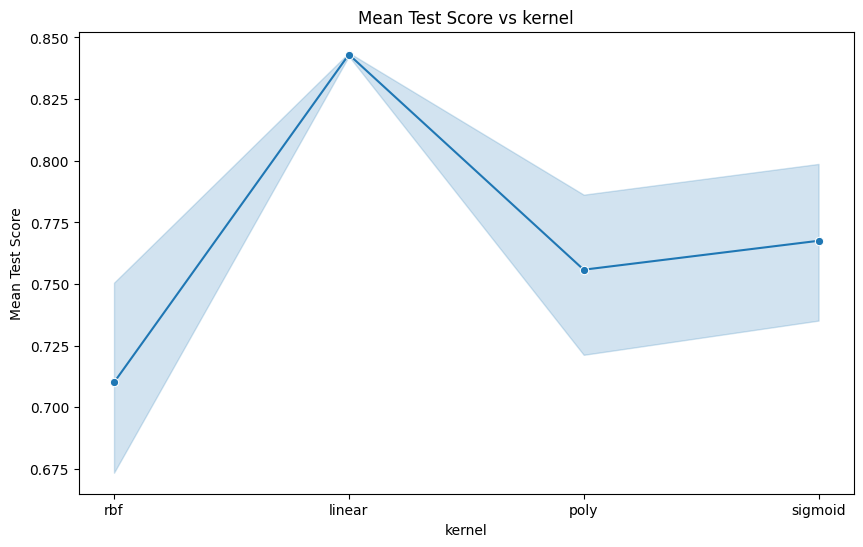

In [55]:
results_svm = pd.DataFrame(svmGrid.cv_results_)

# since hyperparameter 'gamma' have 2 numeric values (1,0.1) and two categorical values ('scale' , 'auto'). we convert the whole into string

results_svm['param_gamma'] = results_svm['param_gamma'].astype(str)

# Plotting for All the parameters one by one


plot_hyperparameter(results_svm,'C')
plot_hyperparameter(results_svm,'gamma')
plot_hyperparameter(results_svm,'kernel')



### Interpretation

Above plots shows the mean model score with respect to different hyperparameters

<h3> Finding Best Features </h3>

In [32]:
# Get the best hyperparameters and model
best_params = svmGrid.best_params_
best_model = svmGrid.best_estimator_


# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")


Best SVM Accuracy: 0.8186
Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


### Conclusion:

SVM model doing better performance in default parameters than grid search hyperparameter. It is because we give Grid Search less parameters , it will take mode time if we give more hyparameters to Grid Search.




<h3>Hyperparameter Tuning Of K-Nearest Neighbors (KNN)</h3>

In [38]:


KNNparameter_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10],
    'weights': ['uniform', 'distance'],
   'metric': ['euclidean','manhattan', 'chebyshev','minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],


}

knnGrid = GridSearchCV(estimator=defaultKNNModel , param_grid=KNNparameter_grid ,  cv = 5)
knnGrid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

### Plotting

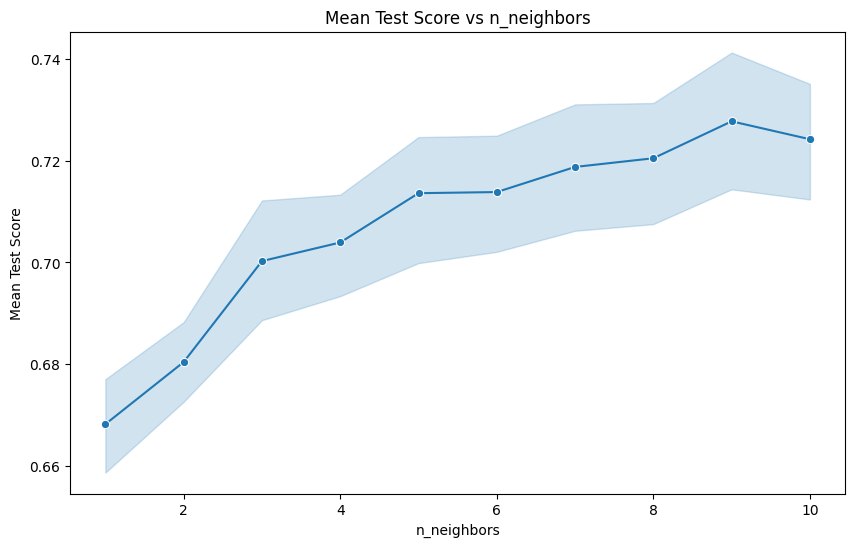

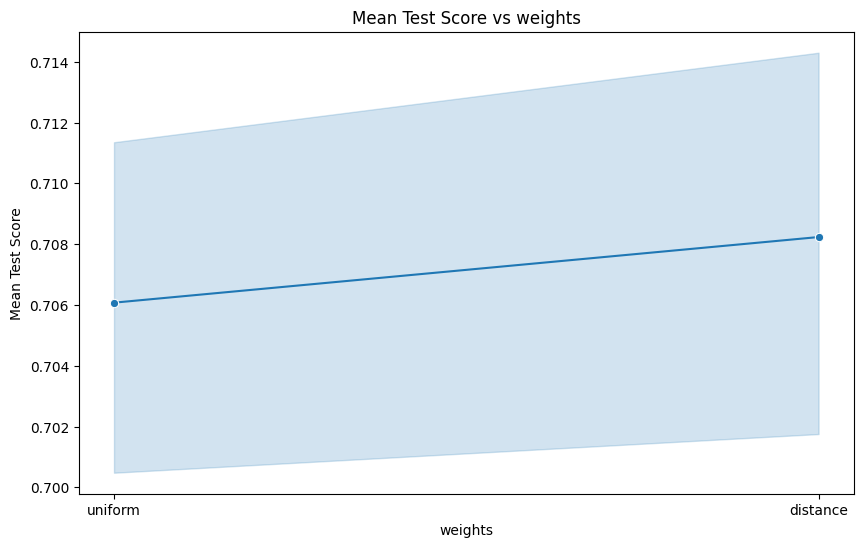

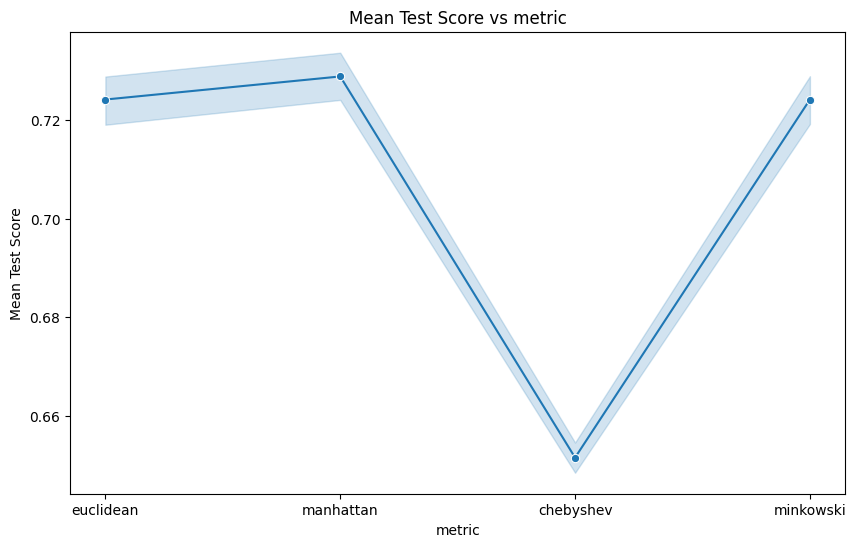

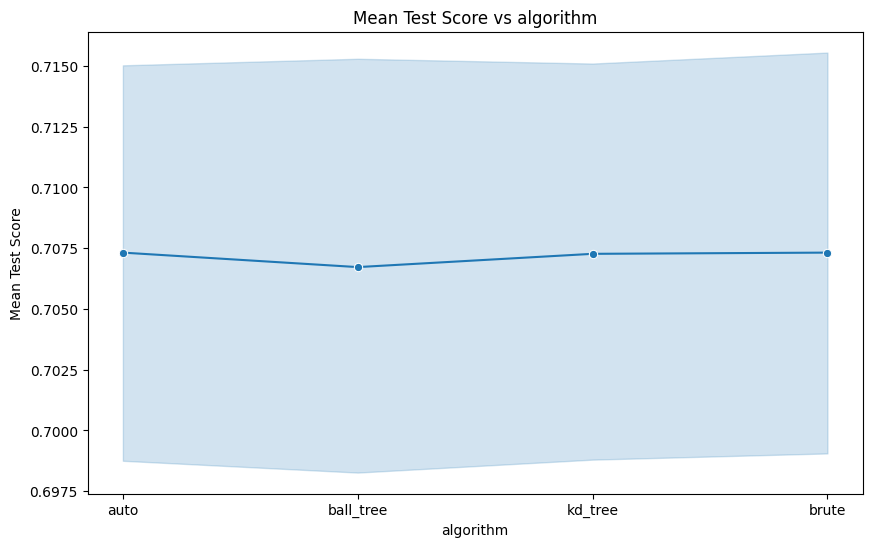

In [56]:
results_knn = pd.DataFrame(knnGrid.cv_results_)

# Plotting for All the parameters one by one
plot_hyperparameter(results_knn,'n_neighbors')
plot_hyperparameter(results_knn,'weights')
plot_hyperparameter(results_knn,'metric')
plot_hyperparameter(results_knn,'algorithm')

### Interpretation

Above plots shows the mean model score with respect to different hyperparameters

<h3> Finding Best Features </h3>




In [39]:
# Get the best hyperparameters and model
best_params = knnGrid.best_params_
best_model = knnGrid.best_estimator_


# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")


Best SVM Accuracy: 0.7233
Best Hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


### Conclusion

KNN model doing better performance in default parameters than grid search hyperparameter. It is because we give Grid Search less parameters , it will take mode time if we give more hyparameters to Grid Search.


<h2 align = center> <font color = '#2E578B'>Bayesian Search </font></h2>

<h3>Hyperparameter Tuning Of Logistic Regression</h3>


In [64]:

LGparameter_bayes = {

    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'class_weight': ['balanced', None],
    'tol' : [0.0001 ,0.0002,0.0004,0.001],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga']

}

lgBayes = BayesSearchCV(estimator=defaultLRModel , search_spaces=LGparameter_bayes,cv = 5)
lgBayes.fit(X_train,y_train)






C:\Users\Syed Abdullah\AppData\Roaming\Python\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.1), None, np.str_('liblinear'), np.float64(0.0001)] before, using random point [10, None, 'saga', 0.001]
  warnings.warn(


BayesSearchCV(cv=5, estimator=LogisticRegression(),
              search_spaces={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                             'class_weight': ['balanced', None],
                             'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'sag', 'saga'],
                             'tol': [0.0001, 0.0002, 0.0004, 0.001]})


### Plotting


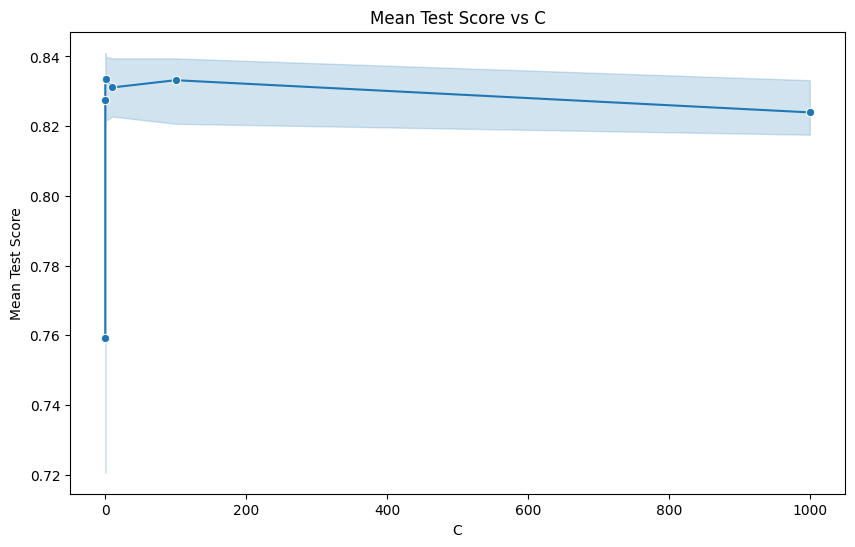

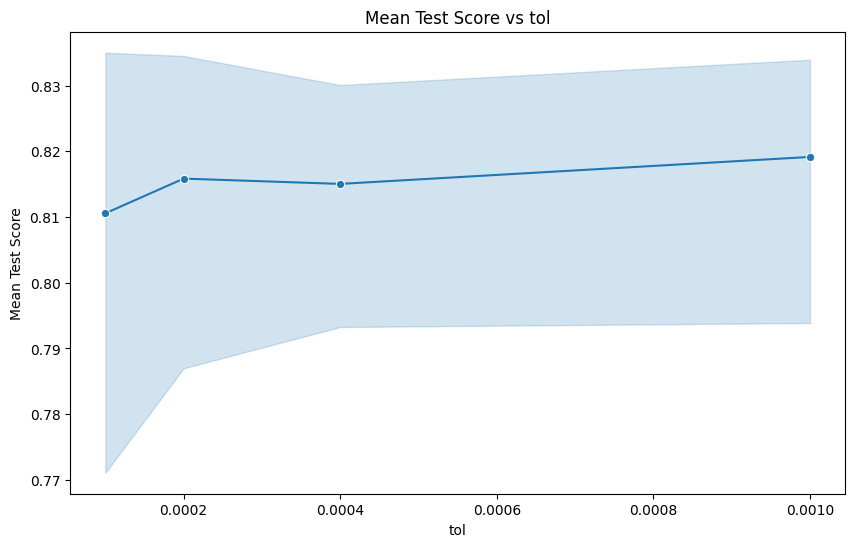

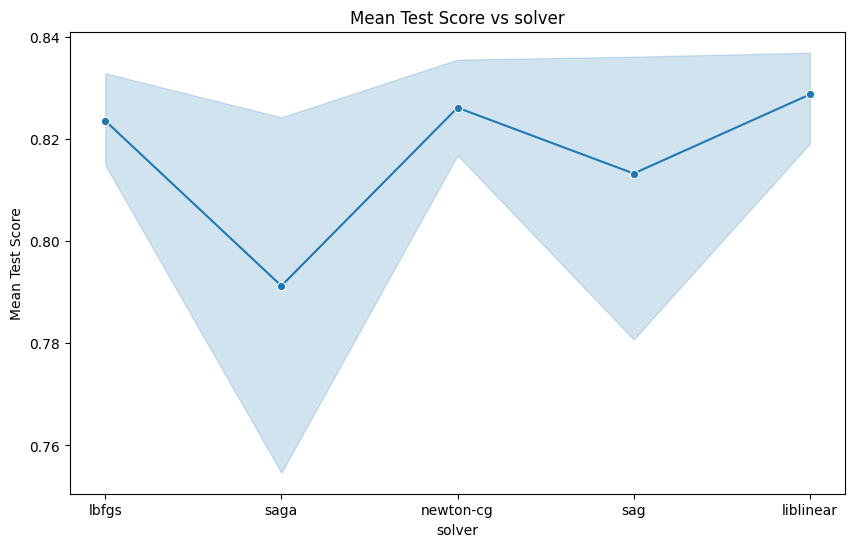

In [65]:

results_lg_bayes = pd.DataFrame(lgBayes.cv_results_)

# Plotting for All the parameters one by one

plot_hyperparameter(results_lg_bayes,'C')
plot_hyperparameter(results_lg_bayes,'tol')
plot_hyperparameter(results_lg_bayes,'solver')

<h3> Finding Best Features </h3>


In [66]:
# Get the best hyperparameters and model
best_params = lgBayes.best_params_
best_model = lgBayes.best_estimator_


# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Logistic Regression Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")




Best Logistic Regression Accuracy: 0.8302
Best Hyperparameters: OrderedDict({'C': 0.1, 'class_weight': None, 'solver': 'liblinear', 'tol': 0.001})



### Conclusion

Logistic Regression model doing better performance in default parameters than bayes search hyperparameter.


<h3>Hyperparameter Tuning Of Support Vector Machine (SVM)</h3>

In [67]:

SVMparameter_bayes = {

    'C': [ 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1,'scale','auto'],
    'kernel': ['rbf', 'linear', 'poly','sigmoid'],    
}

svmBayes = BayesSearchCV(estimator=defaultSVMModel , search_spaces=SVMparameter_bayes, cv = 5)
svmBayes.fit(X_train,y_train)

BayesSearchCV(cv=5, estimator=SVC(),
              search_spaces={'C': [0.01, 0.1, 1, 10],
                             'gamma': [1, 0.1, 'scale', 'auto'],
                             'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

### Plotting

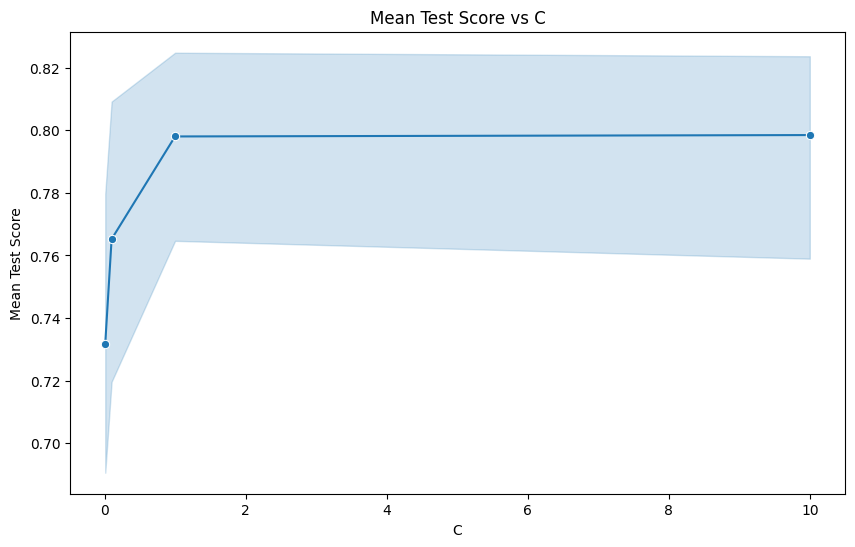

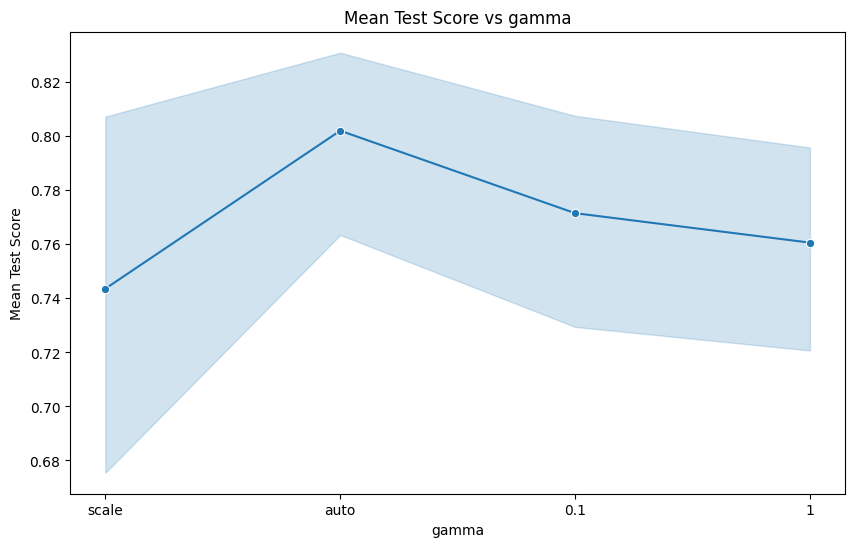

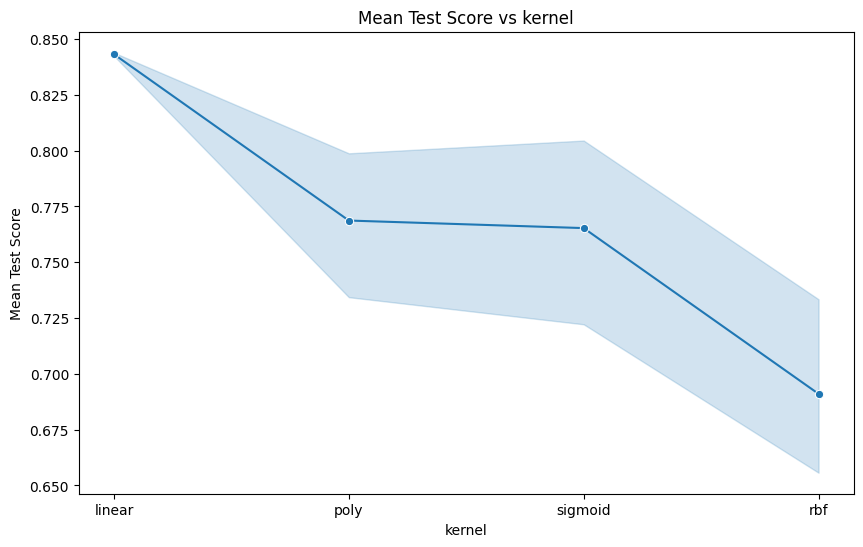

In [68]:

results_svm = pd.DataFrame(svmBayes.cv_results_)

# since hyperparameter 'gamma' have 2 numeric values (1,0.1) and two categorical values ('scale' , 'auto'). we convert the whole into string

results_svm['param_gamma'] = results_svm['param_gamma'].astype(str)

# Plotting for All the parameters one by one


plot_hyperparameter(results_svm,'C')
plot_hyperparameter(results_svm,'gamma')
plot_hyperparameter(results_svm,'kernel')



<h3> Finding Best Features </h3>


In [70]:
# Get the best hyperparameters and model
best_params = lgBayes.best_params_
best_model = lgBayes.best_estimator_


# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")





Best SVM Accuracy: 0.8302
Best Hyperparameters: OrderedDict({'C': 0.1, 'class_weight': None, 'solver': 'liblinear', 'tol': 0.001})



### Conclusion


SVM model doing better performance in default parameters than bayes search hyperparameter. It is because we give Bayes Search less parameters , it will take mode time if we give more hyparameters to Bayes Search.


<h3>Hyperparameter Tuning Of K-Nearest Neighbor (KNN)</h3>


In [71]:

KNNparameter_bayes = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10],
    'weights': ['uniform', 'distance'],
   'metric': ['euclidean','manhattan', 'chebyshev','minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knnBayes = BayesSearchCV(estimator=defaultKNNModel , search_spaces=KNNparameter_bayes,cv = 5)
knnBayes.fit(X_train,y_train)


BayesSearchCV(cv=5, estimator=KNeighborsClassifier(),
              search_spaces={'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                           'brute'],
                             'metric': ['euclidean', 'manhattan', 'chebyshev',
                                        'minkowski'],
                             'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                             'weights': ['uniform', 'distance']})

### Plotting

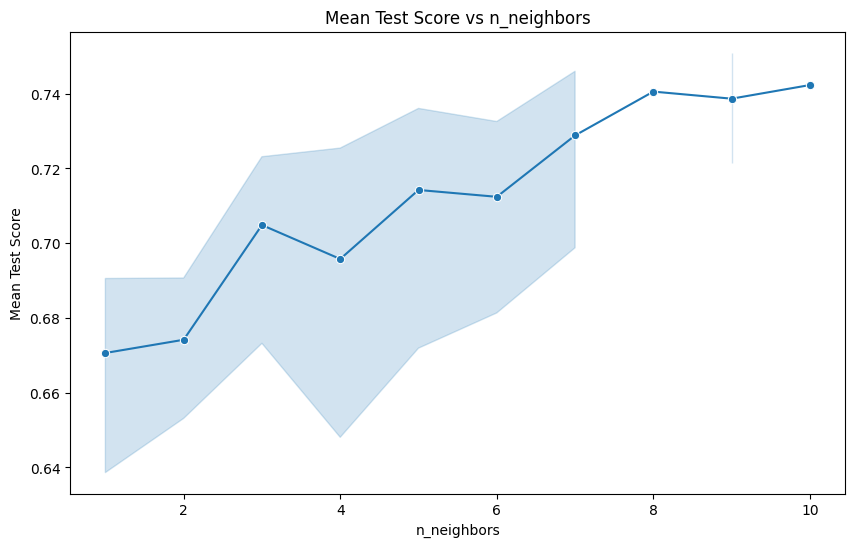

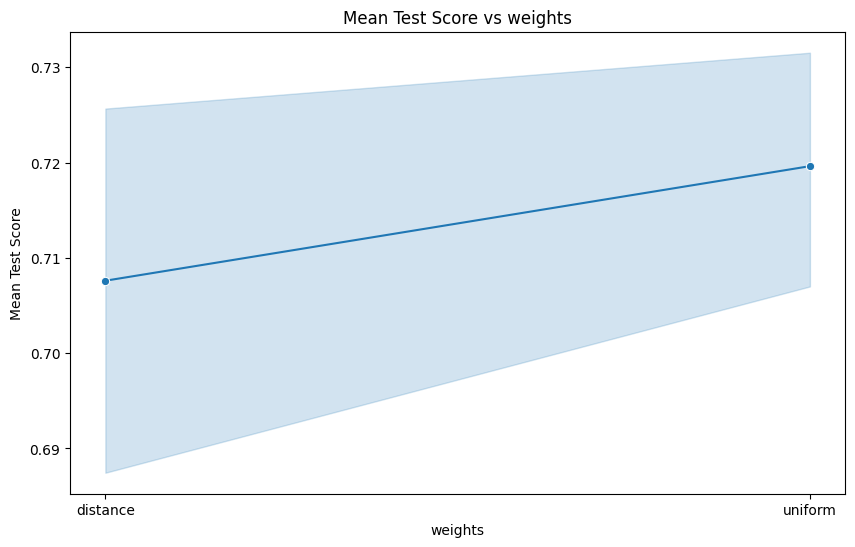

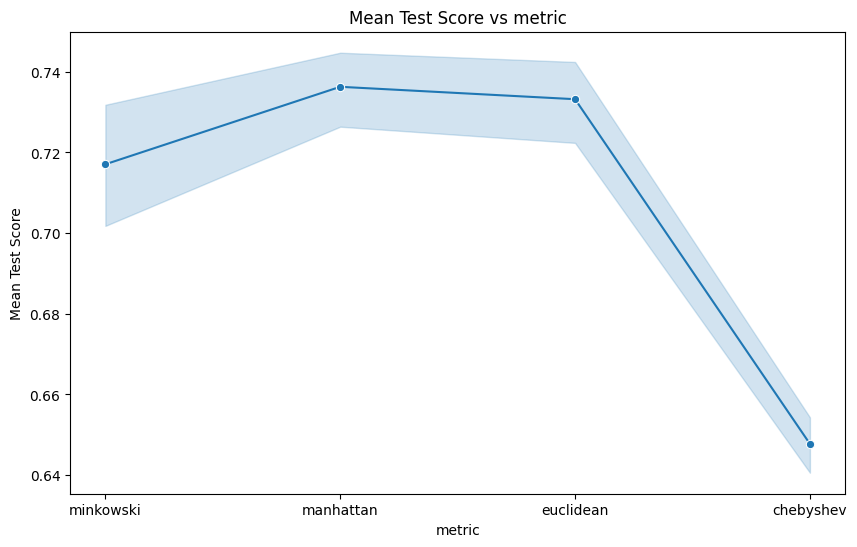

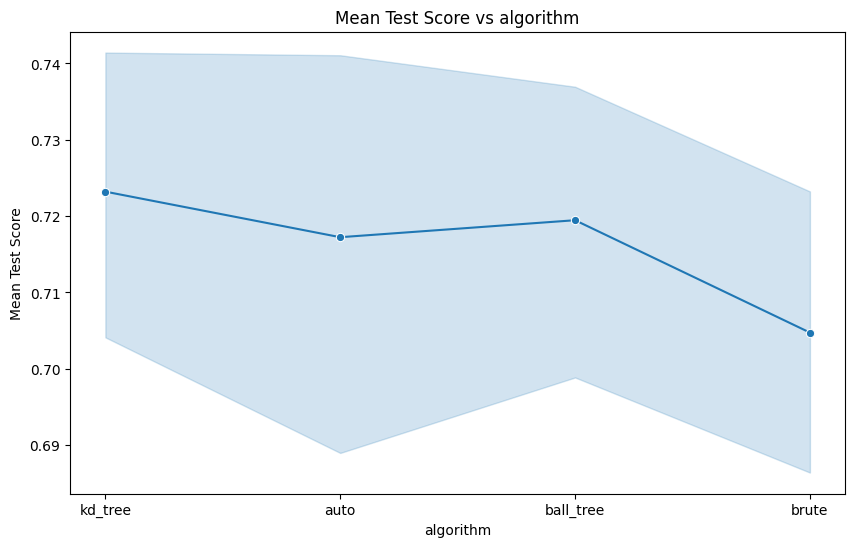

In [73]:

results_knn = pd.DataFrame(knnBayes.cv_results_)

# Plotting for All the parameters one by one


plot_hyperparameter(results_knn,'n_neighbors')
plot_hyperparameter(results_knn,'weights')
plot_hyperparameter(results_knn,'metric')
plot_hyperparameter(results_knn,'algorithm')







<h3> Finding Best Features </h3>


In [74]:

# Get the best hyperparameters and model

best_params = knnBayes.best_params_
best_model = knnBayes.best_estimator_


# Evaluate the best model

y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best KNN Accuracy: {accuracy_best:.4f}")
print(f"Best Hyperparameters: {best_params}")

Best KNN Accuracy: 0.7116
Best Hyperparameters: OrderedDict({'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'})


<h1 align = center> <font color= '#F9F6EE'>Conclusion</h1>

All the models (Logistic Regression, SVM, KNN) performed well on their default hyperparameters. The Hyperparameters find by grid search,random search and bayes search are gave the same performance. The hyperparameters found by searching techniques performed worse because i gave them very little amount of hyperparameters to find , this can be the reason why the founded hyperparameters didn't perform well. We can increase the amount of hyperparameters found by searching but it will increase the computational power.